**INITIALIZATION:**

In [1]:
#@ IMPORTING NECESSARY PACKAGES AND LIBRARIES: 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
#@ DEFINING SIGMOID ACTIVATION FUNCTION: 
def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))

#@ DEFINING PREDICT FUNCTION:
def predict(X, W):                                     # Defining Function. 
    preds = sigmoid_activation(X.dot(W))               # Initializing Dot Product. 
    preds[preds <= 0.5] = 0                            # Implementing Thresholds. 
    preds[preds > 0.5] = 1                             # Implementing Thresholds. 
    return preds                                       # Getting Predictions. 

#@ DEFINING NEXT BATCH FUNCTION: 
def next_batch(X, y, batchSize):                       # Defining Function. 
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], y[i:i + batchSize]) # Initializing Batches. 

**GETTING THE DATASET:**

In [3]:
#@ GETTING THE DATASET: EXAMPLE: 
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, 
                    cluster_std=1.5, random_state=42)           # Initializing Classification Dataset. 
y = y.reshape((y.shape[0], 1))                                  # Reshaping Dataset. 
X = np.c_[X, np.ones((X.shape[0]))]                             # Inserting Column Matrix. 
(trainX, testX, trainY, testY) = train_test_split(
    X, y, test_size=0.5, random_state=42)                       # Partitioning Dataset into Training and Testing. 

**STOCHASTIC GRADIENT DESCENT:**
- Stochastic Gradient Descent is a simple modification to the standard gradient descent algorithm that computes the gradient and updates the weight matrix on small batches of training data, rather than the entire training set. 

In [8]:
#@ INITIALIZING PARAMETERS: 
print("[INFO] training...")
epochs, lr, batchsize = 100, 0.01, 32                  # Initializing Epochs and LR. 
W = np.random.randn(X.shape[1], 1)                     # Initializing Weights. 
losses = []                                            # Initialization. 

#@ INITIALIZING STOCHASTIC GRADIENT DESCENT: 
for epoch in np.arange(0, epochs):
    epochLoss = []                                     # Initialization. 
    for (batchX, batchY) in next_batch(X,y,batchsize):
        preds = sigmoid_activation(batchX.dot(W))      # Implementating Sigmoid Activation. 
        error = preds - batchY                         # Computing Least Square Error. 
        epochLoss.append(np.sum(error**2))             # Updating. 
        gradient = batchX.T.dot(error)                 # Computing Gradient Descent. 
        W += -lr * gradient                            # Updating Weights. 
    loss = np.average(epochLoss)                       # Initializing Loss. 
    losses.append(loss)
    if epoch==0 or (epoch+1) % 5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(
            int(epoch+1), loss))

[INFO] training...
[INFO] epoch=1, loss=1.2054598
[INFO] epoch=5, loss=0.0792159
[INFO] epoch=10, loss=0.0675258
[INFO] epoch=15, loss=0.0616096
[INFO] epoch=20, loss=0.0576062
[INFO] epoch=25, loss=0.0545596
[INFO] epoch=30, loss=0.0520902
[INFO] epoch=35, loss=0.0500094
[INFO] epoch=40, loss=0.0482092
[INFO] epoch=45, loss=0.0466223
[INFO] epoch=50, loss=0.0452035
[INFO] epoch=55, loss=0.0439211
[INFO] epoch=60, loss=0.0427516
[INFO] epoch=65, loss=0.0416777
[INFO] epoch=70, loss=0.0406856
[INFO] epoch=75, loss=0.0397644
[INFO] epoch=80, loss=0.0389054
[INFO] epoch=85, loss=0.0381014
[INFO] epoch=90, loss=0.0373465
[INFO] epoch=95, loss=0.0366356
[INFO] epoch=100, loss=0.0359644


In [5]:
#@ INITIALIZING MODEL EVALUATION: 
print("[INFO] evaluating...")
preds = predict(testX, W)                   # Computing Predictions. 
print(classification_report(testY, preds))  # Inspecting Classification Report. 

[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       248

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



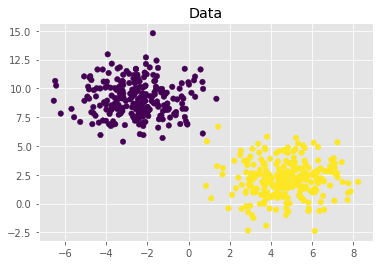

In [7]:
#@ INSPECTING CLASSIFICATION DATA: 
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY, s=30)
plt.show();

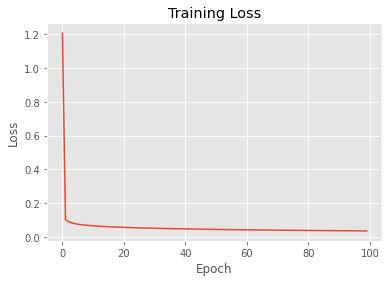

In [9]:
#@ INSPECTING LOSS:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();